# Real-Time Data Analysis Dashboard


### A real-time data analysis dashboard is a graphical interface that provides users with up-to-date information and insights derived from analyzing streaming or constantly updating data. These dashboards typically display key metrics, trends, and visualizations that help users monitor, understand, and act on the data in real-time.


#### Why Exploratory data analysis for this?

##### Performing Exploratory Data Analysis (EDA) on your dataset, even if it's in CSV format for a real-time dashboard, can provide valuable insights and help you better understand the characteristics of your data. While real-time dashboards typically focus on monitoring ongoing trends and patterns, conducting EDA can still be beneficial for several reasons:

##### 1.Data Quality Assessment: EDA allows you to check the quality and integrity of your data. You can identify missing values, outliers, inconsistencies, or errors that may affect the reliability of your real-time dashboard.

##### 2.Understanding Data Distribution: By visualizing the distribution of your data through histograms, box plots, or density plots, you can gain insights into the range, central tendency, and variability of your variables. This understanding can inform your choice of visualization techniques and help you interpret the real-time trends more effectively.

##### 3.Identifying Patterns and Relationships: Exploring relationships between different variables using scatter plots, correlation matrices, or heatmaps can reveal patterns and dependencies in your data. Understanding these relationships can guide the selection of relevant metrics and KPIs to monitor in your real-time dashboard.

##### Feature Engineering: EDA can inspire feature engineering ideas by highlighting potential transformations, interactions, or combinations of variables that may improve the predictive power or interpretability of your dashboard metrics.



##### 5.User Requirements Analysis: EDA can also inform your understanding of user requirements and preferences. By visualizing different aspects of the data, you can identify key insights and trends that are relevant to your users' needs and interests.

###### Step 1: Importing Libraries

In [122]:
import pandas as pd
import matplotlib
import numpy
from sklearn import datasets
from matplotlib import pyplot

In [123]:
from pandas.plotting import scatter_matrix
import warnings
import seaborn as sns
import os

##### Step 2: Reading Dataset

In [124]:
data = pd.read_csv("Store Data.csv")

In [125]:
data.tail()

,index,Order ID,Cust ID,Gender,Age,Age Group,Date,Month,Status,Channel,...,Category,Size,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
31042,31043,405-4724097-1016369,4724097,Men,60,Senior,1/6/2022,Jan,Delivered,Flipkart,...,kurta,XL,1,INR,565,PUNE,MAHARASHTRA,412307,IN,False
31043,31044,405-4724097-1016369,4724097,Men,34,Adult,1/6/2022,Jan,Delivered,Myntra,...,Set,S,1,INR,939,BENGALURU,KARNATAKA,560061,IN,False
31044,31045,408-3572295-5992330,3572295,Men,29,Teenager,1/6/2022,Jan,Delivered,Amazon,...,Set,L,1,INR,1115,PITHORAGARH,UTTARAKHAND,262501,IN,False
31045,31046,405-1423498-9705162,1423498,Men,46,Adult,1/6/2022,Jan,Delivered,Amazon,...,kurta,M,1,INR,399,DHULE,MAHARASHTRA,424006,IN,False
31046,31047,408-4694875-8249153,4694875,Men,36,Adult,1/6/2022,Jan,Delivered,Flipkart,...,Western Dress,3XL,1,INR,791,WARANGAL,TELANGANA,506001,IN,False


In [126]:
data['ship-state'].unique()

array(['PUNJAB', 'HARYANA', 'WEST BENGAL', 'TAMIL NADU', 'MAHARASHTRA',
       'KARNATAKA', 'ANDHRA PRADESH', 'KERALA', 'ASSAM', 'TELANGANA',
       'DELHI', 'ODISHA', 'RAJASTHAN', 'UTTAR PRADESH', 'MADHYA PRADESH',
       'UTTARAKHAND', 'ANDAMAN & NICOBAR ', 'GUJARAT', 'CHANDIGARH',
       'JHARKHAND', 'BIHAR', 'HIMACHAL PRADESH', 'PUDUCHERRY',
       'DADRA AND NAGAR', 'SIKKIM', 'GOA', 'ARUNACHAL PRADESH', 'MANIPUR',
       'JAMMU & KASHMIR', 'TRIPURA', 'New Delhi', 'CHHATTISGARH', 'Bihar',
       'LADAKH', 'MEGHALAYA', 'NAGALAND', 'MIZORAM', 'goa', 'Punjab',
       'Delhi', 'Nagaland', 'delhi', 'Goa', 'Chandigarh', 'punjab',
       'Arunachal Pradesh', 'bihar', 'Manipur', 'Sikkim',
       'Arunachal pradesh'], dtype=object)

In [127]:
def rectify_state_names(state_name):
  """
  This function corrects the state name in the `ship-state` column based on a provided list of states and union territories of India.

  Args:
      state_name (str): The state name to be corrected.

  Returns:
      str: The corrected state name (or the original name if no correction is needed).
  """

  # Define a dictionary to map incorrect names to their corrected versions
  state_corrections = {
      "PUNJAB": "PUNJAB",
      "HARYANA": "HARYANA",
      "WEST BENGAL": "WEST BENGAL",
      "TAMIL NADU": "TAMIL NADU",
      "MAHARASHTRA": "MAHARASHTRA",
      "KARNATAKA": "KARNATAKA",
      "ANDHRA PRADESH": "ANDHRA PRADESH",
      "KERALA": "KERALA",
      "ASSAM": "ASSAM",
      "TELANGANA": "TELANGANA",
      "DELHI": "DELHI",
      "ODISHA": "ODISHA",
      "RAJASTHAN": "RAJASTHAN",
      "UTTAR PRADESH": "UTTAR PRADESH",
      "MADHYA PRADESH": "MADHYA PRADESH",
      "UTTARAKHAND": "UTTARAKHAND",
      "ANDAMAN & NICOBAR ": "ANDAMAN AND NICOBAR ISLANDS",  # Handle extra space
      "GUJARAT": "GUJARAT",
      "CHANDIGARH": "CHANDIGARH",
      "JHARKHAND": "JHARKHAND",
      "BIHAR": "BIHAR",
      "HIMACHAL PRADESH": "HIMACHAL PRADESH",
      "PUDUCHERRY": "PUDUCHERRY",
      "DADRA AND NAGAR": "DADRA AND NAGAR HAVELI",
      "SIKKIM": "SIKKIM",
      "GOA": "GOA",
      "ARUNACHAL PRADESH": "ARUNACHAL PRADESH",
      "MANIPUR": "MANIPUR",
      "JAMMU & KASHMIR": "JAMMU AND KASHMIR",
      "TRIPURA": "TRIPURA",
      "New Delhi": "DELHI",  # Handle variations of Delhi
      "CHHATTISGARH": "CHHATTISGARH",
      "LADAKH": "LADAKH",
      "MEGHALAYA": "MEGHALAYA",
      "NAGALAND": "NAGALAND",
      "MIZORAM": "MIZORAM",
      # Handle lowercase variations (assuming these are typos)
      "goa": "GOA",
      "punjab": "PUNJAB",
      "delhi": "DELHI",
      "nagaland": "NAGALAND",
      "bihar": "BIHAR",
      # Handle extra spaces (assuming these are typos)
      "Arunachal pradesh": "ARUNACHAL PRADESH"
  }

  # Standardize the input state name (uppercase for consistency)
  state_name = state_name.upper()

  # Check if the state name exists in the correction dictionary
  if state_name in state_corrections:
    return state_corrections[state_name]
  else:
    # If no correction is found, return the original name
    return state_name

# Example usage (assuming your data is in a DataFrame called 'data')
data['ship-state'] = data['ship-state'].apply(rectify_state_names)


In [128]:
data['ship-state'].unique()

array(['PUNJAB', 'HARYANA', 'WEST BENGAL', 'TAMIL NADU', 'MAHARASHTRA',
       'KARNATAKA', 'ANDHRA PRADESH', 'KERALA', 'ASSAM', 'TELANGANA',
       'DELHI', 'ODISHA', 'RAJASTHAN', 'UTTAR PRADESH', 'MADHYA PRADESH',
       'UTTARAKHAND', 'ANDAMAN AND NICOBAR ISLANDS', 'GUJARAT',
       'CHANDIGARH', 'JHARKHAND', 'BIHAR', 'HIMACHAL PRADESH',
       'PUDUCHERRY', 'DADRA AND NAGAR HAVELI', 'SIKKIM', 'GOA',
       'ARUNACHAL PRADESH', 'MANIPUR', 'JAMMU AND KASHMIR', 'TRIPURA',
       'NEW DELHI', 'CHHATTISGARH', 'LADAKH', 'MEGHALAYA', 'NAGALAND',
       'MIZORAM'], dtype=object)

In [129]:
data['ship-city'] = data['ship-city'].str.upper()

In [130]:
data.describe()

,index,Cust ID,Age,Qty,Amount,ship-postal-code
count,31047.00000,3.104700e+04,31047.000000,31047.000000,31047.000000,31047.000000
mean,15524.00000,4.936824e+06,39.496570,1.006120,682.074822,460474.587206
std,8962.64124,2.900678e+06,15.117233,0.094088,268.582173,198116.733009
min,1.00000,8.950000e+02,18.000000,1.000000,229.000000,110001.000000
25%,7762.50000,2.416471e+06,28.000000,1.000000,486.000000,313001.000000
50%,15524.00000,4.909885e+06,37.000000,1.000000,646.000000,500028.000000
75%,23285.50000,7.454182e+06,47.000000,1.000000,794.000000,600040.000000
max,31047.00000,9.999233e+06,78.000000,5.000000,3036.000000,855117.000000


In [131]:
import pandas as pd
import random

def manipulate_dates(data):
    # Convert date column to datetime type
    data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y')

    # Extract year
    year = 2022

    # Generate a list of all dates within the year
    all_dates = pd.date_range(start=f'01-01-{year}', end=f'31-12-{year}')

    # Shuffle the list of dates randomly
    random.shuffle(all_dates)

    # Update the date column with shuffled dates
    data['date'] = all_dates

    return data
print(data)


       index             Order ID  Cust ID Gender  Age Age Group       Date  \
0          1  171-1029312-3038738  1029312  Women   44     Adult  12/4/2022   
1          2  405-2183842-2225946  2183842  Women   29  Teenager  12/4/2022   
2          3  171-1641533-8921966  1641533  Women   67    Senior  12/4/2022   
3          4  404-7490807-6300351  7490807  Women   20  Teenager  12/4/2022   
4          5  403-9293516-4577154  9293516  Women   62    Senior  12/4/2022   
...      ...                  ...      ...    ...  ...       ...        ...   
31042  31043  405-4724097-1016369  4724097    Men   60    Senior   1/6/2022   
31043  31044  405-4724097-1016369  4724097    Men   34     Adult   1/6/2022   
31044  31045  408-3572295-5992330  3572295    Men   29  Teenager   1/6/2022   
31045  31046  405-1423498-9705162  1423498    Men   46     Adult   1/6/2022   
31046  31047  408-4694875-8249153  4694875    Men   36     Adult   1/6/2022   

      Month     Status  Channel   ...       Categor

In [132]:
january_data = data[data['Month'] == 'Jan']

# Calculate the sum of the 'Amount' column for January
january_total_amount = january_data['Amount'].sum()

print("Total amount in January:", january_total_amount)

Total amount in January: 1820601


In [133]:
data.head()

,index,Order ID,Cust ID,Gender,Age,Age Group,Date,Month,Status,Channel,...,Category,Size,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,1,171-1029312-3038738,1029312,Women,44,Adult,12/4/2022,Dec,Delivered,Myntra,...,kurta,XXL,1,INR,376,MOHALI,PUNJAB,140301,IN,False
1,2,405-2183842-2225946,2183842,Women,29,Teenager,12/4/2022,Dec,Delivered,Ajio,...,Set,L,1,INR,1449,GURUGRAM,HARYANA,122002,IN,False
2,3,171-1641533-8921966,1641533,Women,67,Senior,12/4/2022,Dec,Delivered,Myntra,...,Set,S,1,INR,453,KOLKATA,WEST BENGAL,700029,IN,False
3,4,404-7490807-6300351,7490807,Women,20,Teenager,12/4/2022,Dec,Delivered,Amazon,...,Set,M,1,INR,729,THANJAVUR,TAMIL NADU,613007,IN,False
4,5,403-9293516-4577154,9293516,Women,62,Senior,12/4/2022,Dec,Delivered,Myntra,...,kurta,XXL,1,INR,544,GURUGRAM,HARYANA,122001,IN,False


In [134]:
data.head()

,index,Order ID,Cust ID,Gender,Age,Age Group,Date,Month,Status,Channel,...,Category,Size,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,1,171-1029312-3038738,1029312,Women,44,Adult,12/4/2022,Dec,Delivered,Myntra,...,kurta,XXL,1,INR,376,MOHALI,PUNJAB,140301,IN,False
1,2,405-2183842-2225946,2183842,Women,29,Teenager,12/4/2022,Dec,Delivered,Ajio,...,Set,L,1,INR,1449,GURUGRAM,HARYANA,122002,IN,False
2,3,171-1641533-8921966,1641533,Women,67,Senior,12/4/2022,Dec,Delivered,Myntra,...,Set,S,1,INR,453,KOLKATA,WEST BENGAL,700029,IN,False
3,4,404-7490807-6300351,7490807,Women,20,Teenager,12/4/2022,Dec,Delivered,Amazon,...,Set,M,1,INR,729,THANJAVUR,TAMIL NADU,613007,IN,False
4,5,403-9293516-4577154,9293516,Women,62,Senior,12/4/2022,Dec,Delivered,Myntra,...,kurta,XXL,1,INR,544,GURUGRAM,HARYANA,122001,IN,False


In [135]:
data.tail()

,index,Order ID,Cust ID,Gender,Age,Age Group,Date,Month,Status,Channel,...,Category,Size,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
31042,31043,405-4724097-1016369,4724097,Men,60,Senior,1/6/2022,Jan,Delivered,Flipkart,...,kurta,XL,1,INR,565,PUNE,MAHARASHTRA,412307,IN,False
31043,31044,405-4724097-1016369,4724097,Men,34,Adult,1/6/2022,Jan,Delivered,Myntra,...,Set,S,1,INR,939,BENGALURU,KARNATAKA,560061,IN,False
31044,31045,408-3572295-5992330,3572295,Men,29,Teenager,1/6/2022,Jan,Delivered,Amazon,...,Set,L,1,INR,1115,PITHORAGARH,UTTARAKHAND,262501,IN,False
31045,31046,405-1423498-9705162,1423498,Men,46,Adult,1/6/2022,Jan,Delivered,Amazon,...,kurta,M,1,INR,399,DHULE,MAHARASHTRA,424006,IN,False
31046,31047,408-4694875-8249153,4694875,Men,36,Adult,1/6/2022,Jan,Delivered,Flipkart,...,Western Dress,3XL,1,INR,791,WARANGAL,TELANGANA,506001,IN,False


In [136]:
data.columns

Index(['index', 'Order ID', 'Cust ID', 'Gender', 'Age', 'Age Group', 'Date',
       'Month', 'Status', 'Channel ', 'SKU', 'Category', 'Size', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B'],
      dtype='object')

In [137]:
data.isnull().sum()

index               0
Order ID            0
Cust ID             0
Gender              0
Age                 0
Age Group           0
Date                0
Month               0
Status              0
Channel             0
SKU                 0
Category            0
Size                0
Qty                 0
currency            0
Amount              0
ship-city           0
ship-state          0
ship-postal-code    0
ship-country        0
B2B                 0
dtype: int64

##### 1. Based on Unserstanding of the data, what kind of business is this comapny in?

###### Answer: In-store data presents information about retail businesses' in-store activities and metrics such as footfall traffic (people counting), customer behavior, sales data, customer buying patterns, and product stocks.

In [138]:
# Univariate Analysis for Numeric Variables
numeric_variables = ['Age', 'Amount', 'Qty']

In [139]:
# Summary statistics
summary_stats_numeric = data[numeric_variables].describe()
print(summary_stats_numeric)

                Age        Amount           Qty
count  31047.000000  31047.000000  31047.000000
mean      39.496570    682.074822      1.006120
std       15.117233    268.582173      0.094088
min       18.000000    229.000000      1.000000
25%       28.000000    486.000000      1.000000
50%       37.000000    646.000000      1.000000
75%       47.000000    794.000000      1.000000
max       78.000000   3036.000000      5.000000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



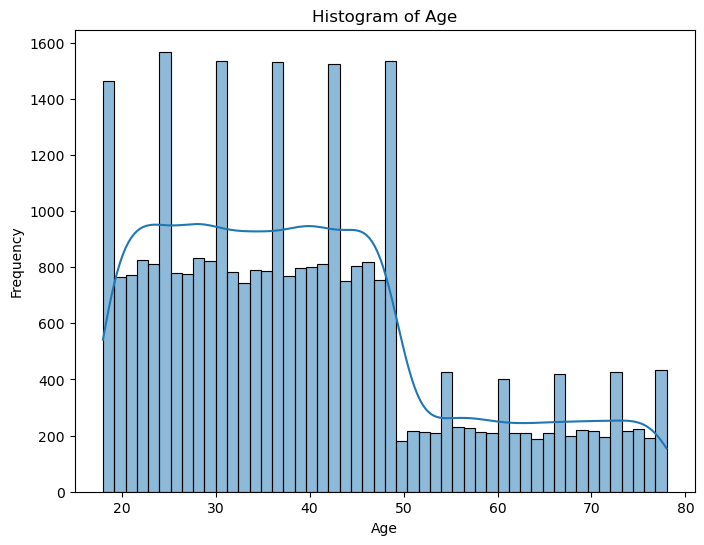

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



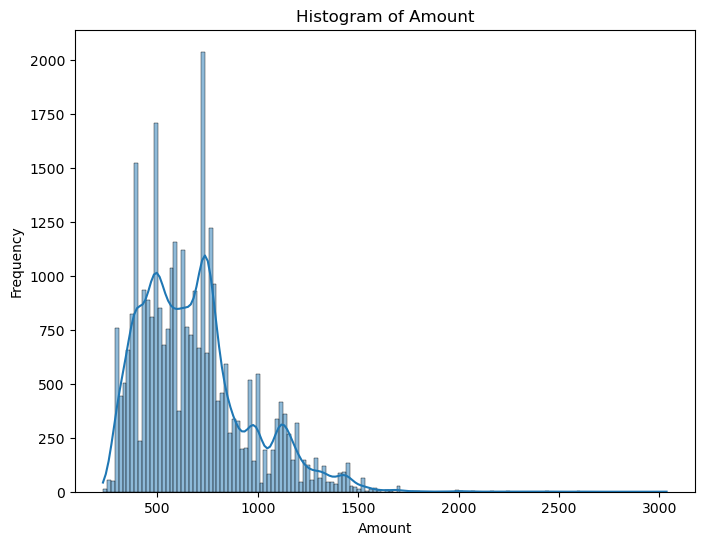

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



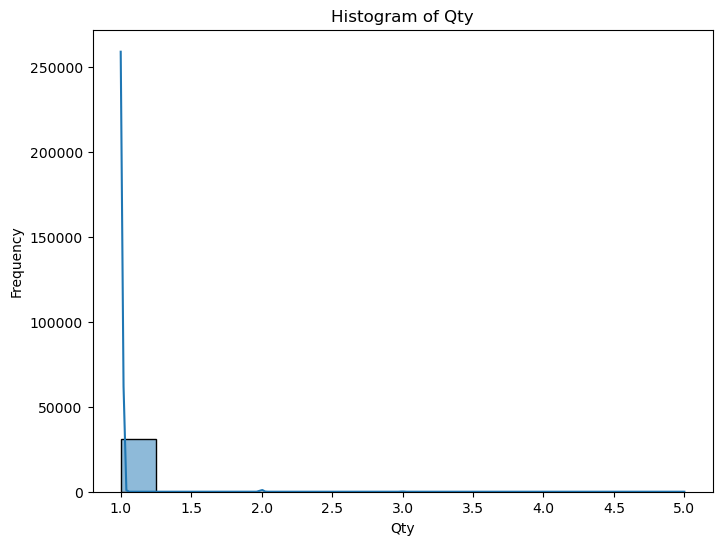

In [140]:
# Visualizations for numeric variables
import matplotlib.pyplot as plt
for var in numeric_variables:
    # Histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(data[var], kde=True)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {var}')
    plt.show()

##### Insights:-

###### Usually people spend 500 - 1000 for shopping and most of the people purchase only single items.

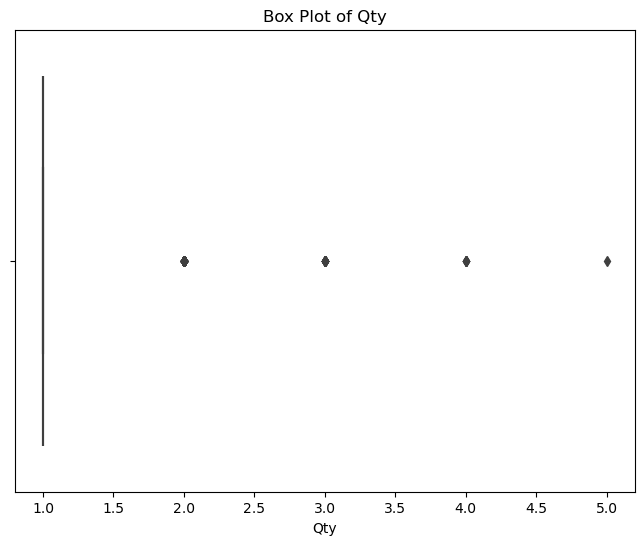

In [141]:
# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x=var)
plt.xlabel(var)
plt.title(f'Box Plot of {var}')
plt.show()

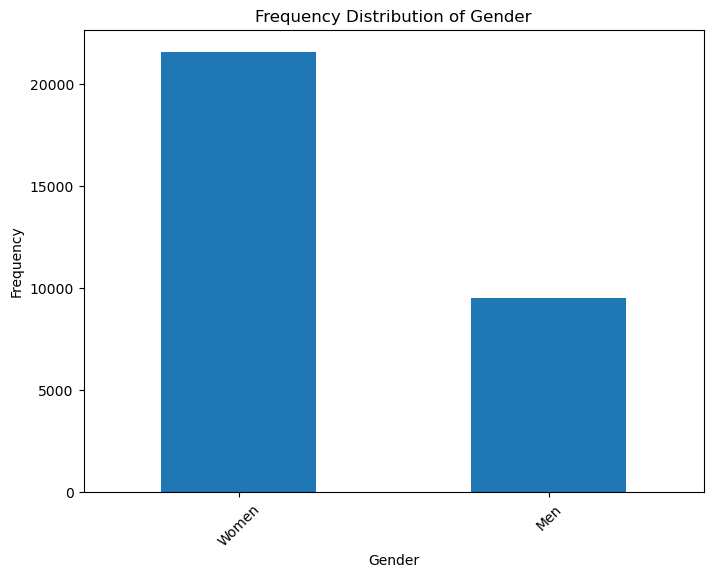

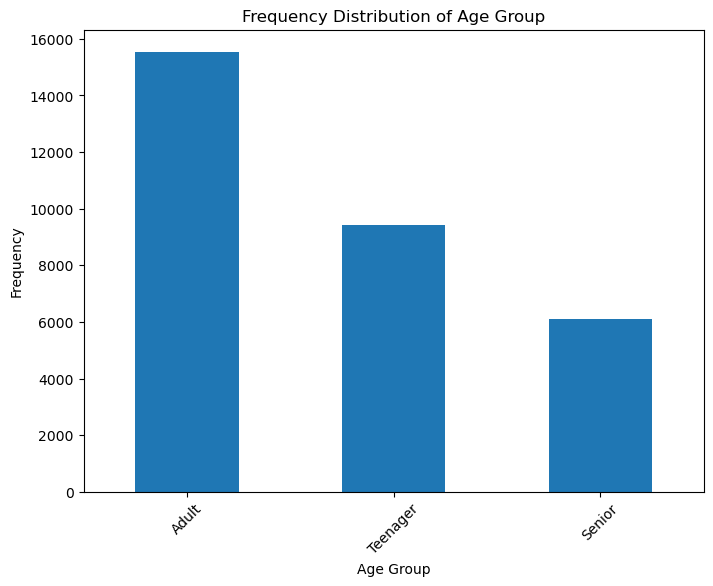

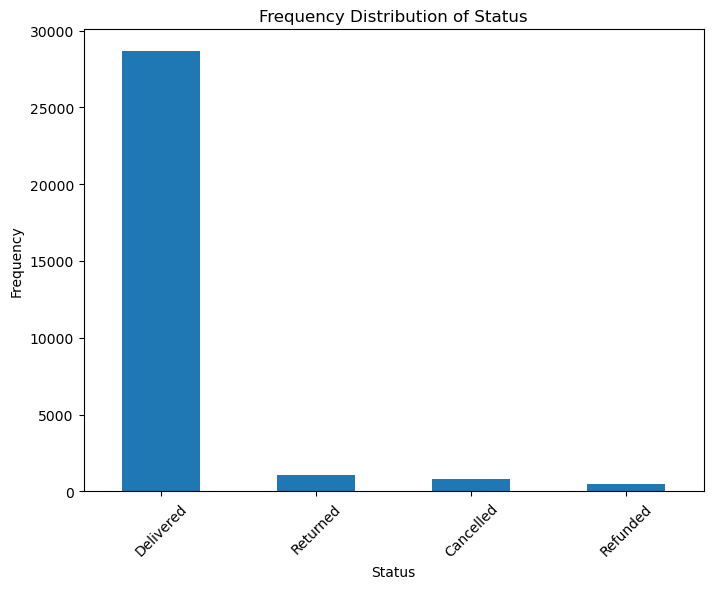

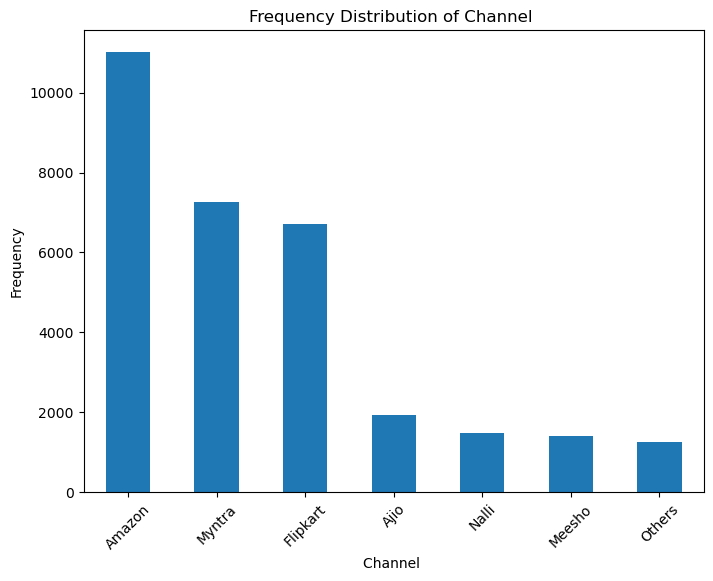

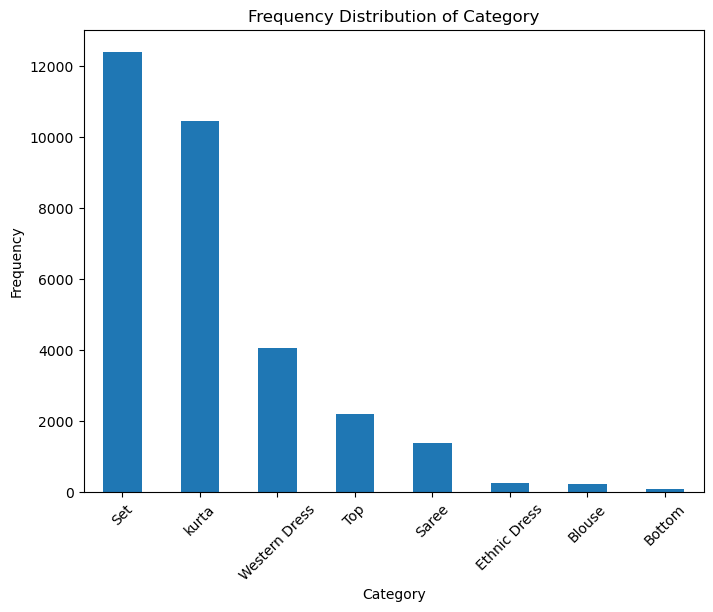

In [142]:
# Univariate Analysis for Categorical Variables
categorical_variables = ['Gender', 'Age Group', 'Status', 'Channel ', 'Category']

# Visualizations for categorical variables
for var in categorical_variables:
    # Frequency distribution (bar chart)
    plt.figure(figsize=(8, 6))
    data[var].value_counts().plot(kind='bar')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Frequency Distribution of {var}')
    plt.xticks(rotation=45)
    plt.show()

##### Insights:

##### Mostly women do shopping, seems men are half in quantity of women

##### From Adult, Teenager and senior, mostly Adult prefer shopping so Markets tarket should be Adult.

##### Top e- commerce business are Amazon then Myntra and then Flipkart

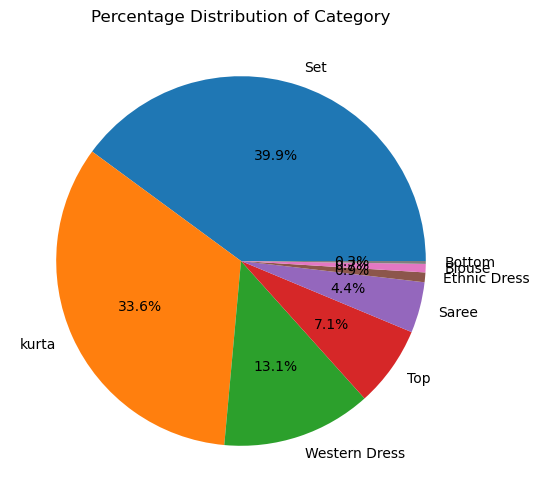

In [143]:
# Frequency distribution (pie chart)
plt.figure(figsize=(8, 6))
data[var].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title(f'Percentage Distribution of {var}')
plt.show()

###### Insights

###### Mostly preferabble dresses are set whose percent are 39.9% after that kurta with 33.6%.

In [144]:
# List of numeric variables
numeric_variables = ['Age', 'Amount', 'Qty']

# Bivariate Analysis for Numeric Variables
# Scatter plots and Correlation Coefficients
for i in range(len(numeric_variables)):
    for j in range(i+1, len(numeric_variables)):
        var1 = numeric_variables[i]
        var2 = numeric_variables[j]


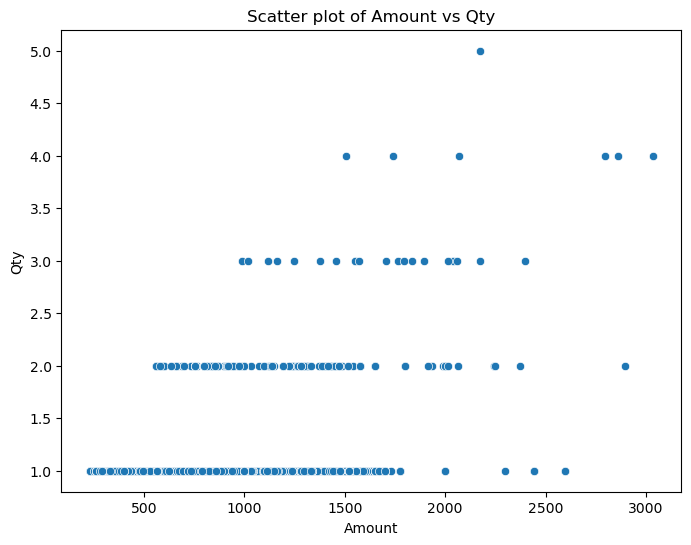

In [145]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x=var1, y=var2)
plt.xlabel(var1)
plt.ylabel(var2)
plt.title(f'Scatter plot of {var1} vs {var2}')
plt.show()

In [146]:
# Correlation coefficient
correlation_coefficient = data[var1].corr(data[var2])
print(f"Correlation coefficient between {var1} and {var2}: {correlation_coefficient}\n")


Correlation coefficient between Amount and Qty: 0.17237736591040187



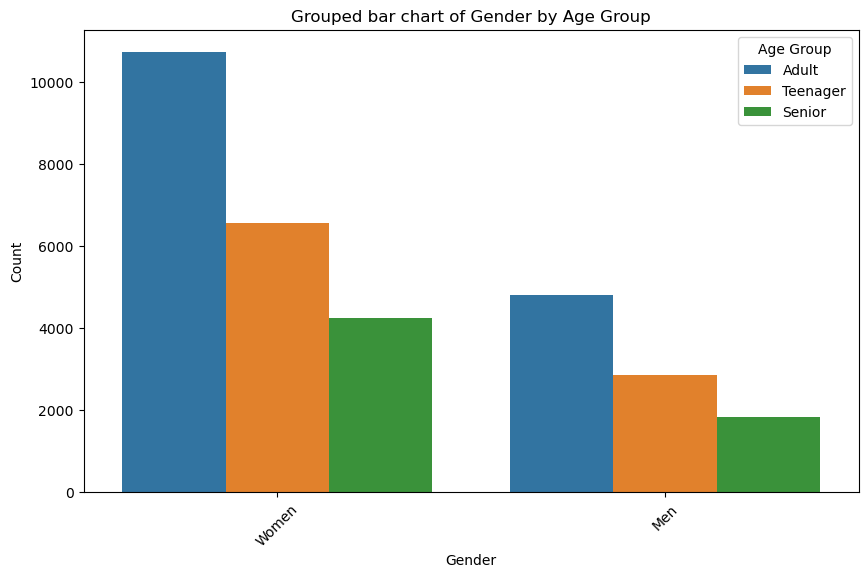

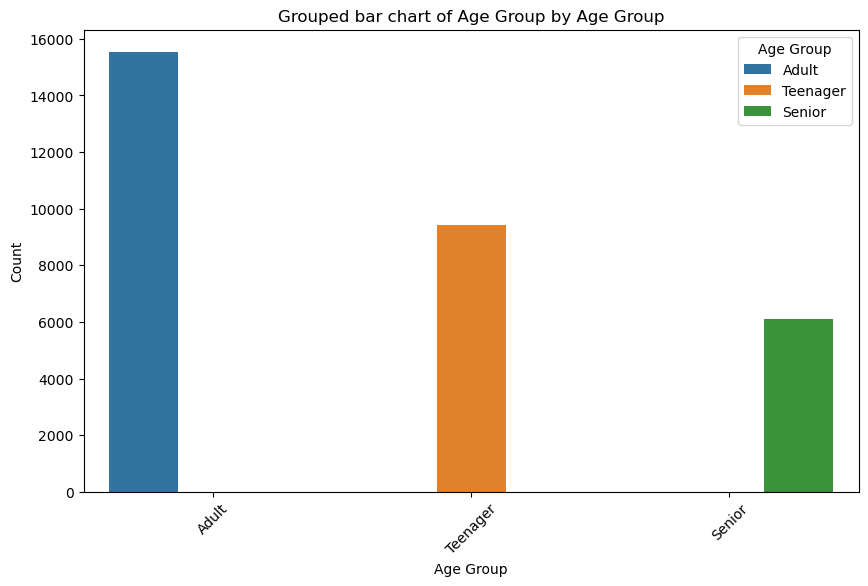

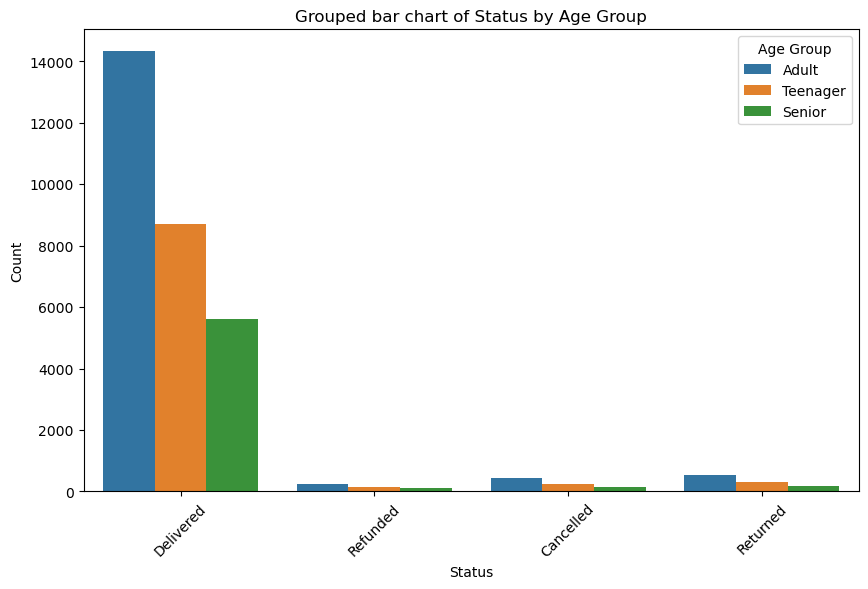

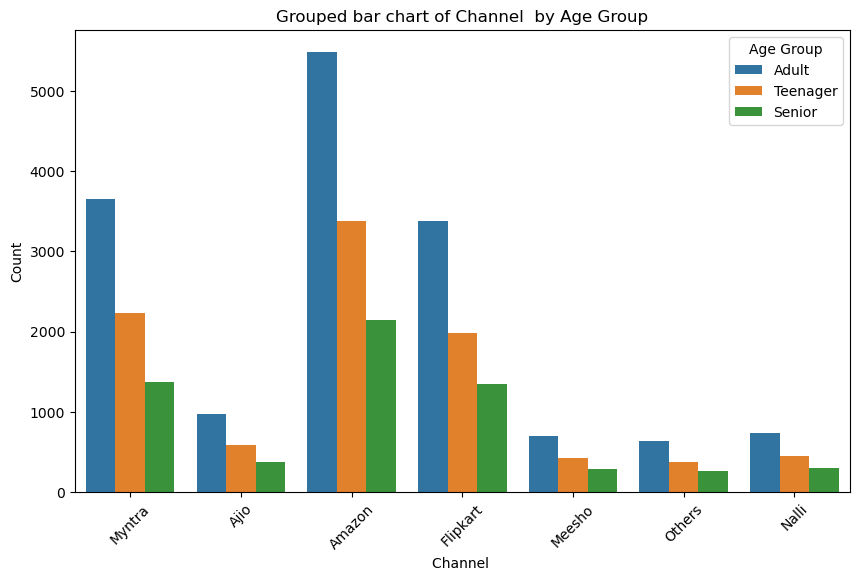

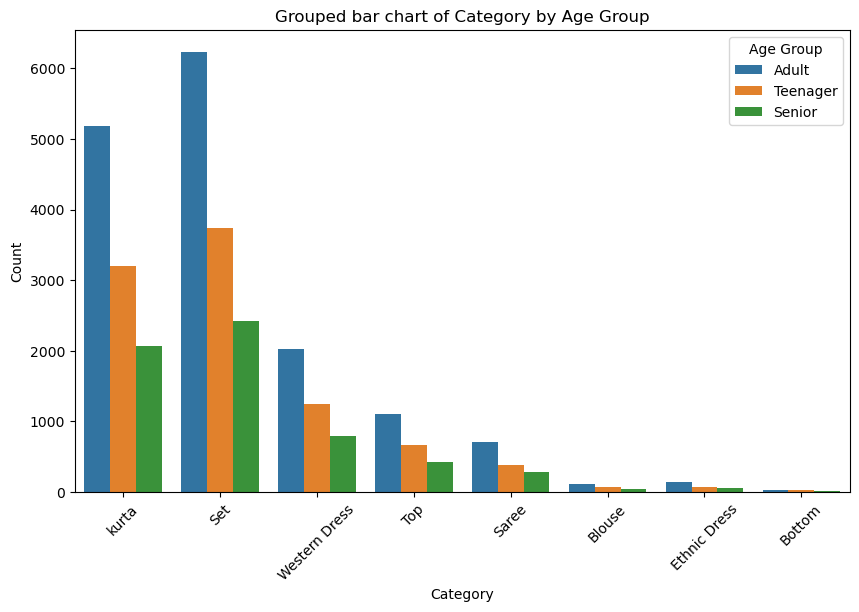

In [147]:
# Bivariate Analysis for Categorical Variables
for cat_var in categorical_variables:
    # Grouped bar chart
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=cat_var, hue='Age Group')
    plt.xlabel(cat_var)
    plt.ylabel('Count')
    plt.title(f'Grouped bar chart of {cat_var} by Age Group')
    plt.xticks(rotation=45)
    plt.legend(title='Age Group')
    plt.show()

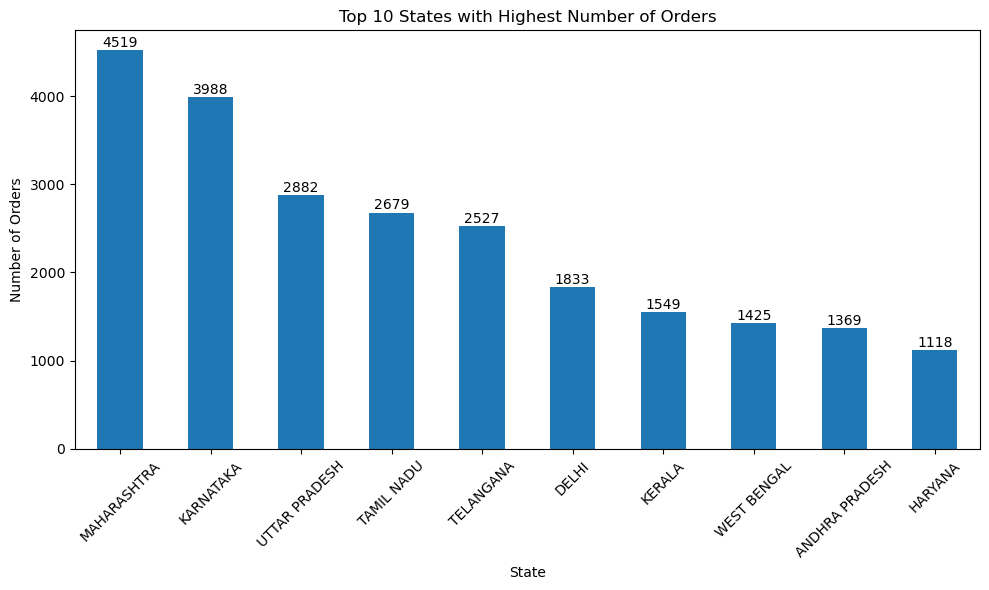

In [148]:
#'ship-state' is the column name containing state orders
state_orders = data['ship-state']

# Get the top 10 states with the highest number of orders
top_10_states = state_orders.value_counts().nlargest(10)

# Plotting the histogram for top 10 states
plt.figure(figsize=(10, 6))
top_10_states.plot(kind='bar')

# Annotate each bar with its order count
for i, count in enumerate(top_10_states):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

plt.title('Top 10 States with Highest Number of Orders')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [149]:
# Group the data by 'ship-state' and 'ship-city', then count the orders for each city within each state
state_city_orders = data.groupby(['ship-state', 'ship-city']).size().reset_index(name='order_count')

# Function to get top 5 cities with maximum order count for each state
def top_5_cities(df):
    return df.nlargest(5, 'order_count')

# Apply the function to get top 5 cities for each state
top_cities_by_state = state_city_orders.groupby('ship-state').apply(top_5_cities)

# Reset index to make 'ship-state' and 'ship-city' regular columns
top_cities_by_state.reset_index(drop=True, inplace=True)

# Print or return the result
print(top_cities_by_state)

                      ship-state      ship-city  order_count
0    ANDAMAN AND NICOBAR ISLANDS     PORT BLAIR           53
1    ANDAMAN AND NICOBAR ISLANDS     PROTHRAPUR            6
2    ANDAMAN AND NICOBAR ISLANDS     FERRARGUNJ            5
3    ANDAMAN AND NICOBAR ISLANDS  GREAT NICOBAR            3
4    ANDAMAN AND NICOBAR ISLANDS      PORTBLAIR            3
..                           ...            ...          ...
158                  WEST BENGAL        KOLKATA          696
159                  WEST BENGAL         HOWRAH           64
160                  WEST BENGAL       SILIGURI           57
161                  WEST BENGAL       NEW TOWN           55
162                  WEST BENGAL       DURGAPUR           30

[163 rows x 3 columns]


###### From above plot we can usually women perform shopping and most preferabble e-commerce site are Amazon and myntra.

In [150]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



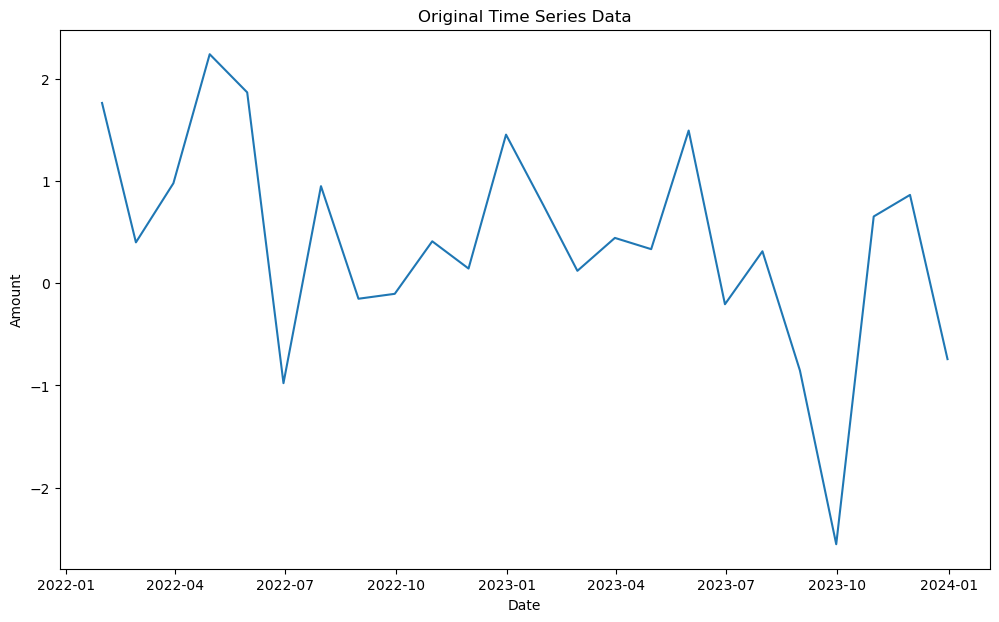

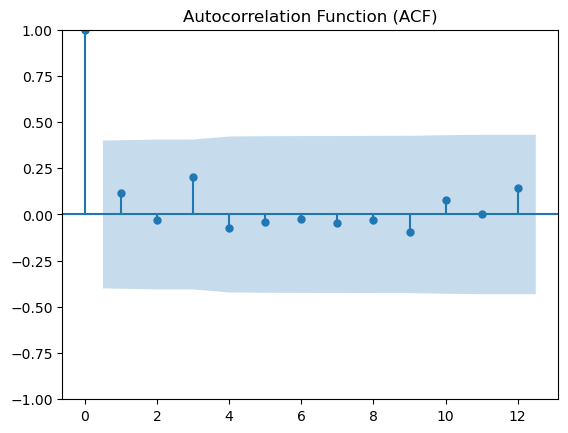

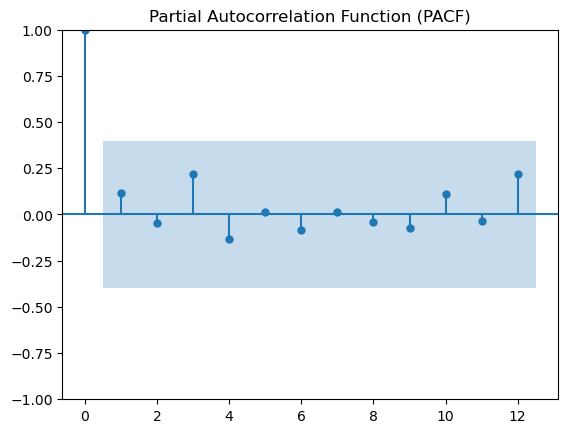

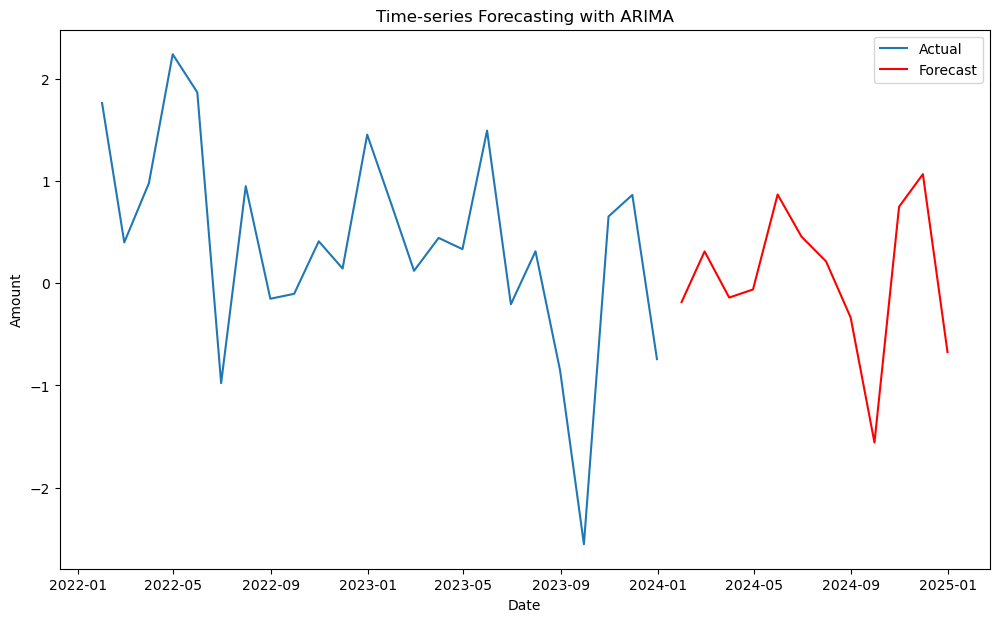

Forecasted Values:
         Date  Forecasted Amount
24 2024-01-31          -0.184264
25 2024-02-29           0.311249
26 2024-03-31          -0.139775
27 2024-04-30          -0.060592
28 2024-05-31           0.868430
29 2024-06-30           0.457036
30 2024-07-31           0.214142
31 2024-08-31          -0.335354
32 2024-09-30          -1.558242
33 2024-10-31           0.748511
34 2024-11-30           1.067677
35 2024-12-31          -0.673483


In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Sample data generation (replace this with your actual data)
np.random.seed(0)
dates = pd.date_range(start='2022-01-01', end='2023-12-31', freq='M')
data = pd.DataFrame({'Date': dates, 'Amount': np.random.randn(len(dates))})

# Plot the original time series data
plt.figure(figsize=(12, 7))
plt.plot(data['Date'], data['Amount'])
plt.title('Original Time Series Data')
plt.xlabel('Date')
plt.ylabel('Amount')
# plt.show()

# Check ACF and PACF plots to determine ARIMA parameters
plot_acf(data['Amount'])
plt.title('Autocorrelation Function (ACF)')
# plt.show()

plot_pacf(data['Amount'])
plt.title('Partial Autocorrelation Function (PACF)')
# plt.show()

order = (0,0,6)
seasonal_order = (0, 0, 2, 12)

model = ARIMA(data['Amount'], order=order, seasonal_order=seasonal_order) #21

model_fit = model.fit()

# Forecast for the next 12 months
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Generate dates for the forecast period
forecast_dates = pd.date_range(start=data['Date'].iloc[-1], periods=forecast_steps + 1, freq='M')[1:]

# Plot the actual data and forecast
plt.figure(figsize=(12, 7))
plt.plot(data['Date'], data['Amount'], label='Actual')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.title('Time-series Forecasting with ARIMA')
plt.xlabel('Date')
plt.ylabel('Amount')

plt.legend()
plt.show()

# Display forecasted values
print("Forecasted Values:")
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted Amount': forecast})
print(forecast_df)

In [152]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Get actual values for the forecast period
actual_values = data['Amount'].tail(12)  # Assuming last 12 values are for forecast period

# Calculate MAE
mae = mean_absolute_error(actual_values, forecast)

# Calculate MSE

mse = mean_squared_error(actual_values, forecast)

# Calculate RMSE
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
# Calculate accuracy percentage for MAE
# accuracy_mae = round(100 * (1 - (mae / actual_values.mean())),2)

# Calculate accuracy percentage for MSE
accuracy_mse = round(100 * (1 - (mse / np.mean(np.square(actual_values - actual_values.mean())))),2)

# Calculate accuracy percentage for RMSE
# accuracy_rmse = round(100 * (1 - (rmse / np.sqrt(np.mean(np.square(actual_values - actual_values.mean()))))),2)

# print("Accuracy percentage (MAE):", accuracy_mae, "%")
print("Accuracy percentage (MSE):", accuracy_mse, "%")
# print("Accuracy percentage (RMSE):", accuracy_rmse, "%")

Mean Absolute Error (MAE): 0.44832112285457515
Mean Squared Error (MSE): 0.2982484509954341
Root Mean Squared Error (RMSE): 0.5461212786510283
Accuracy percentage (MSE): 70.7 %


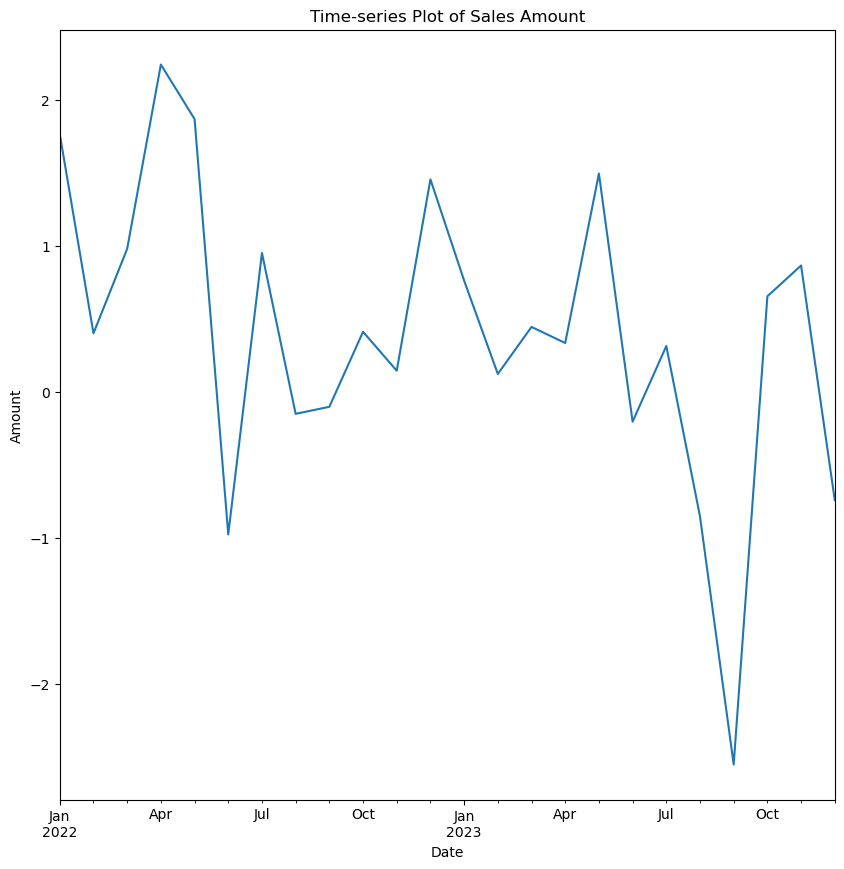

In [153]:
# Temporal Analysis
# Time-series plot
plt.figure(figsize=(10, 10))
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data['Amount'].plot()
plt.title('Time-series Plot of Sales Amount')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.show()


###### Temporal Analysis:



###### Analyze temporal patterns using time-series plots to visualize trends over time.
Decompose time-series data into trend, seasonality, and residual components using techniques like seasonal decomposition.
Use time-series forecasting models (e.g., ARIMA, exponential smoothing) to predict future values based on historical data.

In [154]:
# Seasonal decomposition
decomposition = seasonal_decompose(data['Amount'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

Seasonal Decomposition: Seasonal decomposition is a technique used to decompose a time series into its constituent components: trend, seasonality, and residual. These components help us understand the underlying patterns and variations in the time series data.

seasonal_decompose(data['Amount'], model='additive', period=12): This line applies seasonal decomposition to the 'Amount' column of the DataFrame data. The model='additive' argument indicates that the decomposition model assumes that the time series is an additive combination of its components. The period=12 argument specifies the length of the seasonal cycle, assuming that the data has a seasonal pattern repeating every 12 time periods (e.g., months, quarters).

decomposition.trend: This line extracts the trend component from the seasonal decomposition. The trend represents the underlying long-term pattern or directionality of the time series, capturing gradual changes over time.

decomposition.seasonal: This line extracts the seasonal component from the seasonal decomposition. The seasonal component represents the periodic fluctuations or seasonal patterns in the data, such as monthly or quarterly variations.

decomposition.resid: This line extracts the residual component from the seasonal decomposition. The residual component represents the random or unexplained variation in the data after removing the trend and seasonal components.

By decomposing the time series into these components, seasonal decomposition helps in understanding the various factors contributing to the overall behavior of the data. It can be useful for identifying seasonal patterns, detecting anomalies, and forecasting future values based on historical data.

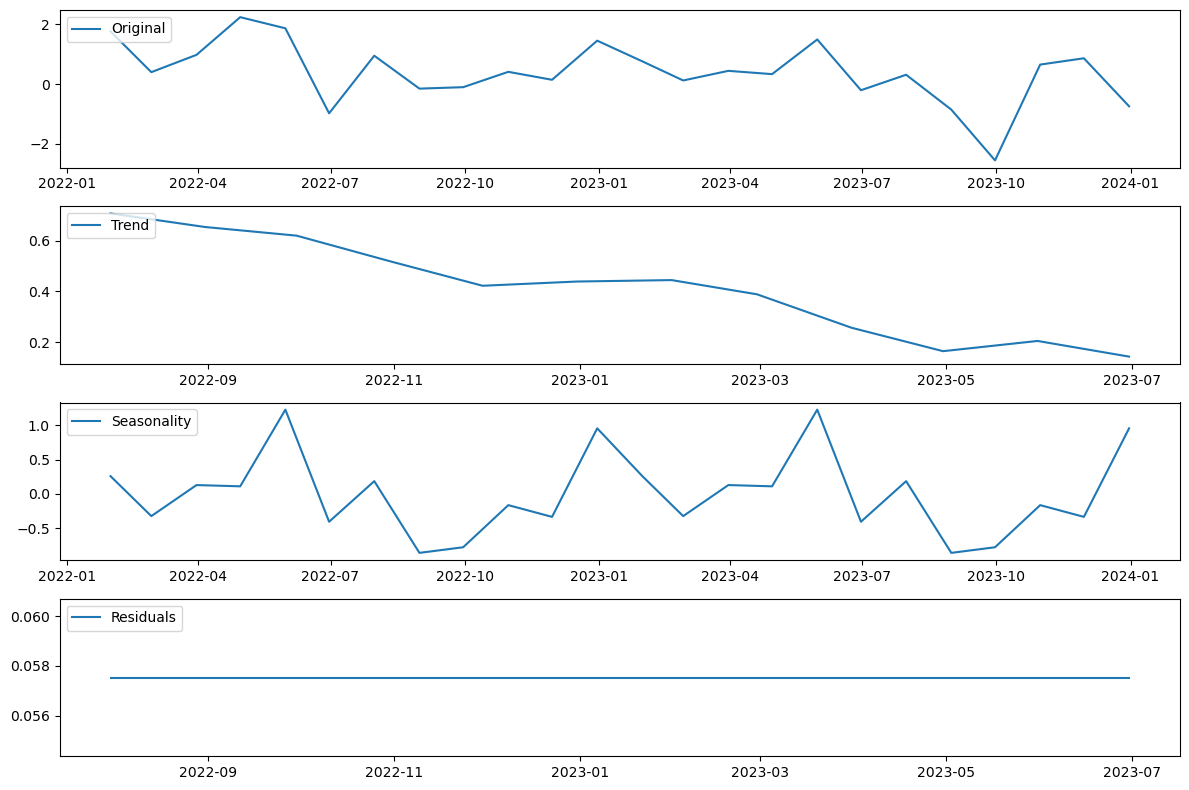

In [155]:
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data['Amount'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

###### The resulting visualization provides a clear view of the original time series data along with its decomposed components: trend, seasonality, and residuals. This breakdown helps in understanding the individual contributions of each component to the overall behavior of the time series. It can aid in identifying patterns, detecting anomalies, and making informed decisions in time series analysis and forecasting.

In [156]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                       
=============================================================================================
Dep. Variable:                                Amount   No. Observations:                   24
Model:             ARIMA(0, 0, 6)x(0, 0, [1, 2], 12)   Log Likelihood                 -31.698
Date:                               Fri, 03 May 2024   AIC                             83.396
Time:                                       13:04:26   BIC                             95.177
Sample:                                            0   HQIC                            86.522
                                                - 24                                         
Covariance Type:                                 opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4964      0.793      0.626      0.532      -1.059       2.052
ma.L1          0.3148    103.867      0.003      0.998    -203.261     203.890
ma.L2         -0.4321     58.149     -0.007      0.994    -114.401     113.537
ma.L3          0.5889     74.542      0.008      0.994    -145.512     146.689
ma.L4          0.5714    102.442      0.006      0.996    -200.210     201.353
ma.L5          0.1166     50.376      0.002      0.998     -98.619      98.853
ma.L6          0.4632     61.331      0.008      0.994    -119.743     120.669
ma.S.L12       1.1507    331.704      0.003      0.997    -648.977     651.278
ma.S.L24       0.1609     51.387      0.003      0.998    -100.556     100.878
sigma2         0.2931     88.466      0.003      0.997    -173.098     173.684
===================================================================================
Ljung-Box (L1) (Q):                   0.51   Jarque-Bera (JB):                 1.95
Prob(Q):                              0.47   Prob(JB):                         0.38
Heteroskedasticity (H):               0.70   Skew:                            -0.64
Prob(H) (two-sided):                  0.62   Kurtosis:                         2.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [157]:
#SARIMA
!pip install --upgrade statsmodels

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.37567D+00    |proj g|=  6.49901D+01

At iterate    5    f=  6.71547D-01    |proj g|=  2.15285D-01


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.



At iterate   10    f=  5.77353D-01    |proj g|=  6.43321D-02

At iterate   15    f=  5.56382D-01    |proj g|=  1.32909D-02

At iterate   20    f=  5.52465D-01    |proj g|=  6.15633D-02

At iterate   25    f=  5.48899D-01    |proj g|=  4.25666D-02

At iterate   30    f=  5.47337D-01    |proj g|=  5.00466D-02

At iterate   35    f=  5.46397D-01    |proj g|=  1.19629D-01

At iterate   40    f=  5.45827D-01    |proj g|=  2.44846D-02

At iterate   45    f=  5.45411D-01    |proj g|=  2.62495D-03

At iterate   50    f=  5.45320D-01    |proj g|=  2.19630D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     64   

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



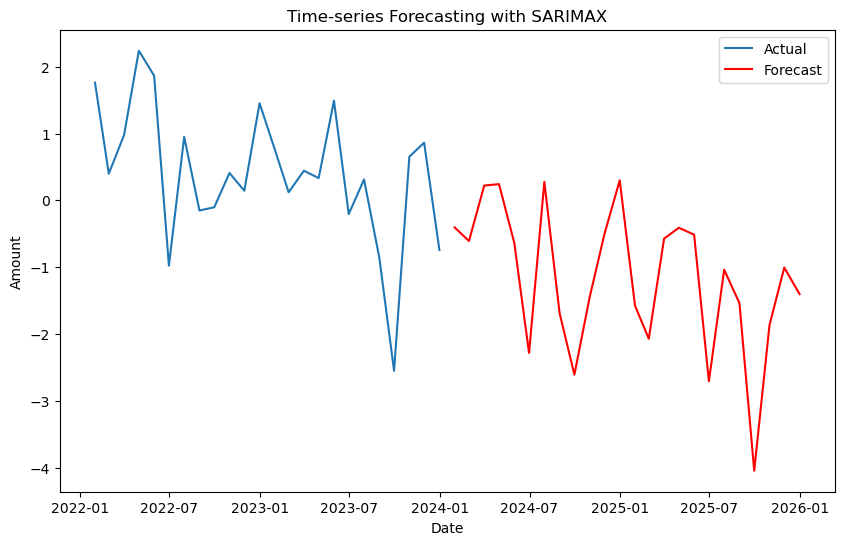

In [158]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMAX model parameters
order = (5, 1, 0)  # (p, d, q) parameters
seasonal_order = (1, 1, 1, 12)  # (P, D, Q, S) seasonal parameters

# Instantiate and fit the SARIMAX model
model = SARIMAX(data['Amount'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

# Make future predictions
forecast = model_fit.forecast(steps=24)

# Plotting the actual data and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Amount'], label='Actual')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('Time-series Forecasting with SARIMAX')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()

In [159]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                               Amount   No. Observations:                   24
Model:             SARIMAX(5, 1, 0)x(1, 1, [1], 12)   Log Likelihood                 -13.088
Date:                              Fri, 03 May 2024   AIC                             42.175
Time:                                      13:04:37   BIC                             45.359
Sample:                                  01-31-2022   HQIC                            40.169
                                       - 12-31-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1822     12.656     -0.093      0.926     -25.988      23.624
ar.L2         -1.4328      5.526     -0.259      0.795     -12.263       9.398
ar.L3         -1.1363      3.380     -0.336      0.737      -7.762       5.489
ar.L4         -0.8001      8.618     -0.093      0.926     -17.692      16.092
ar.L5          0.0970      8.834      0.011      0.991     -17.216      17.410
ar.S.L12      -0.9766      8.383     -0.116      0.907     -17.407      15.454
ma.S.L12      -0.9201   1.07e+04  -8.57e-05      1.000    -2.1e+04     2.1e+04
sigma2         0.0064     69.294   9.21e-05      1.000    -135.807     135.820
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.20
Prob(Q):                              0.84   Prob(JB):                         0.90
Heteroskedasticity (H):               3.38   Skew:                            -0.31
Prob(H) (two-sided):                  0.27   Kurtosis:                         3.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [160]:
!pip install tensorflow


In [161]:
!pip install prophet


13:04:41 - cmdstanpy - INFO - Chain [1] start processing
13:04:42 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



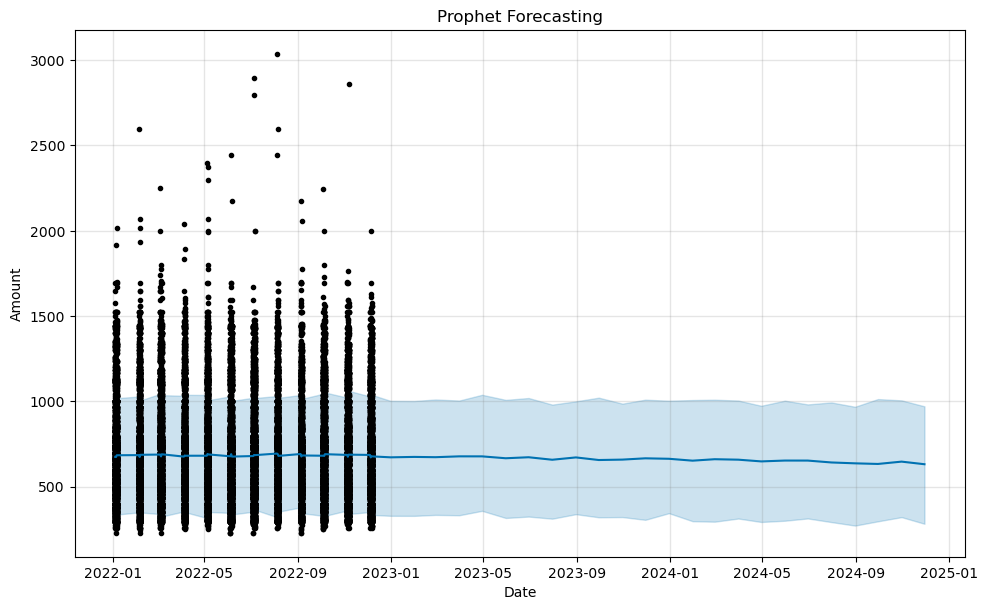

In [162]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Assuming 'data' contains your time-series data with 'Date' as index and 'Amount' as target variable
data = pd.read_csv("Store Data.csv")
data.reset_index(inplace=True)  # Resetting index for Prophet

# Prepare the data
data = data.rename(columns={'Date': 'ds', 'Amount': 'y'})

# Instantiate and fit the model
model = Prophet()  # Note the correct capitalization of Prophet
model.fit(data)

# Make future predictions
future = model.make_future_dataframe(periods=24, freq='M')  # Forecasting 12 months into the future
forecast = model.predict(future)

# Visualize results
fig = model.plot(forecast)
plt.title('Prophet Forecasting')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.show()

In [163]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet
data['ds'] = pd.to_datetime(data['ds'])
#m= Prophet()
m = Prophet(daily_seasonality=False)  # Set daily_seasonality to False
m.fit(data)

# Create future dataframe with monthly frequency (adjust periods as needed)
future = m.make_future_dataframe(periods=24, freq='M') 
forecast=m.predict(future)

forecast.tail()
# Print the first few rows of the DataFrame train


13:04:43 - cmdstanpy - INFO - Chain [1] start processing
13:04:44 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
55,2024-07-31,643.996790,306.332832,1008.127642,598.229586,688.201570,-2.783772,-2.783772,-2.783772,-2.783772,-2.783772,-2.783772,0.0,0.0,0.0,641.213017
56,2024-08-31,642.205523,283.280958,984.015256,592.875631,689.643680,-6.097197,-6.097197,-6.097197,-6.097197,-6.097197,-6.097197,0.0,0.0,0.0,636.108326
57,2024-09-30,640.472040,280.789752,991.866137,588.043875,691.125036,-7.996745,-7.996745,-7.996745,-7.996745,-7.996745,-7.996745,0.0,0.0,0.0,632.475295
58,2024-10-31,638.680773,305.997620,989.589908,582.902922,692.536605,7.420689,7.420689,7.420689,7.420689,7.420689,7.420689,0.0,0.0,0.0,646.101462
59,2024-11-30,636.947290,285.540722,972.795629,577.727158,694.693505,-6.097197,-6.097197,-6.097197,-6.097197,-6.097197,-6.097197,0.0,0.0,0.0,630.850093


In [164]:
forecast[['ds' , 'yhat' , 'yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
55,2024-07-31,641.213017,306.332832,1008.127642
56,2024-08-31,636.108326,283.280958,984.015256
57,2024-09-30,632.475295,280.789752,991.866137
58,2024-10-31,646.101462,305.997620,989.589908
59,2024-11-30,630.850093,285.540722,972.795629


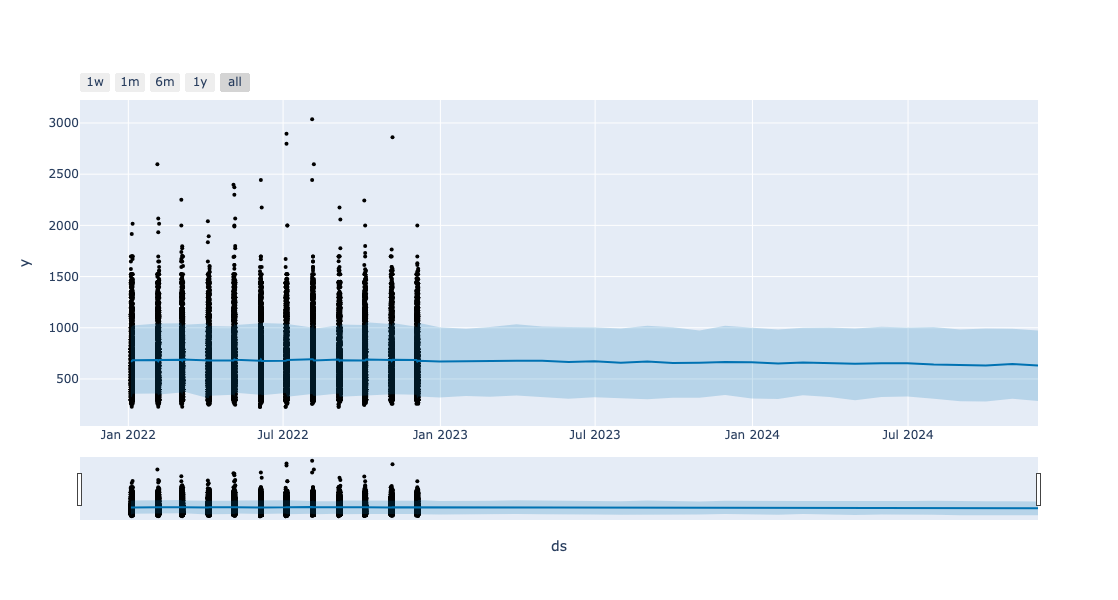

In [165]:
plot_plotly(m,forecast)

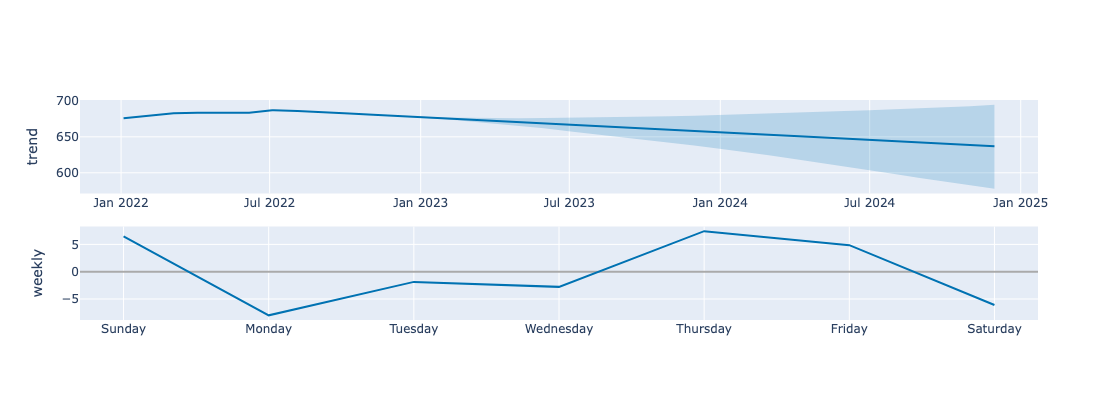

In [89]:
plot_components_plotly(m,forecast)

###### the overall statement executes the entire process of initializing, fitting, and using the ARIMA model to generate forecasts for a time series dataset. It then visualizes these forecasts alongside the actual data, providing insights into future trends and patterns.

The ARIMA (AutoRegressive Integrated Moving Average) model is a popular and widely used time series forecasting technique. It's particularly effective for modeling univariate time series data that exhibits a trend or seasonality. Here's a breakdown of how the ARIMA model works and how it's used:

AutoRegressive (AR) Component:

The ARIMA model includes an autoregressive component, denoted by the parameter p, which captures the relationship between an observation and a fixed number of lagged observations (previous time steps).
This component models the linear dependence between an observation at time 't' and its 'p' most recent observations.
Integrated (I) Component:

The ARIMA model includes an integrated component, denoted by the parameter d, which represents the degree of differencing applied to the time series data.
Differencing involves subtracting the current observation from the previous observation to make the data stationary (i.e., remove trend or seasonality).
The integrated component transforms the original time series into a stationary series, making it suitable for modeling.
Moving Average (MA) Component:

The ARIMA model also includes a moving average component, denoted by the parameter q, which captures the relationship between an observation and a residual error from a moving average model applied to lagged observations.
This component models the dependency between an observation and a residual error from a moving average model.
Model Identification:

The parameters p, d, and q of the ARIMA model need to be determined or selected based on the characteristics of the time series data.
This process often involves visual inspection of the time series plot, autocorrelation function (ACF) plot, and partial autocorrelation function (PACF) plot to identify potential values for p, d, and q.
Model Fitting:

Once the parameters are determined, the ARIMA model is fitted to the time series data using historical observations.
The model estimation involves finding the optimal coefficients for the autoregressive, differencing, and moving average components that minimize the error between the observed and predicted values.
Forecasting:

After fitting the ARIMA model, it can be used to generate forecasts for future time steps.
These forecasts provide estimates of future values based on the historical patterns and relationships captured by the model.
Model Evaluation:

The performance of the ARIMA model can be evaluated using various metrics such as mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), etc.
These metrics quantify the accuracy of the model's forecasts relative to the actual observed values.
Overall, the ARIMA model is a powerful tool for time series forecasting, particularly when dealing with data that exhibits trends or seasonality. It allows analysts and data scientists to make informed predictions about future values based on historical observations.

### Future-Proceeding


Select a dashboarding tool: There are many dashboarding tools available that can help you create real-time dashboards with ease. Some popular options include Tableau, Power BI, Google Data Studio, and Grafana. Choose a tool that best fits your requirements in terms of features, ease of use, and compatibility with your data sources.

Connect your data source: Once you have chosen a dashboarding tool, connect it to your data source(s). This typically involves setting up data connections or integrations provided by the dashboarding tool.

Design your dashboard: Design the layout of your dashboard and decide what visualizations you want to include. Common types of visualizations include charts, graphs, tables, maps, and gauges. Make sure the layout is intuitive and easy to understand for your target audience.

Implement real-time updates: Configure your dashboard to update automatically as new data comes in. Most dashboarding tools support real-time data updates through features like live data connections or scheduled data refreshes.

Add interactivity: Enhance the usability of your dashboard by adding interactive elements such as filters, drill-down capabilities, and dynamic parameters. This allows users to explore the data and gain deeper insights.

Test and iterate: Test your dashboard thoroughly to ensure that it works as expected and provides accurate insights. Gather feedback from users and iterate on the design based on their input.

Deploy your dashboard: Once you're satisfied with your dashboard, deploy it to your intended audience. This could be through a web server, intranet, or embedding it within other applications.

Monitor and maintain: Monitor the performance of your dashboard over time and make any necessary updates or optimizations. Regularly review the data sources, visualizations, and user feedback to ensure that the dashboard remains relevant and effective.